In [73]:
import os, pickle, re, glob, time
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy import stats
from collections import Counter

sns.set_style('ticks')
pd.set_option('precision', 2)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Figure 2C (v1)

- PhD_NUS\Research\CaDRReS2\output\ess_gene_pcor
    - gdsc_drugMedianGE0_cv01_10dim_pred.csv vs gdsc_drugMedianGE0_cv01_10dim_obs.csv. For train add _train.
    - gdsc_drugMedianGE0_cv01_wo_bp_10dim_pred.csv vs gdsc_drugMedianGE0_cv01_10dim_obs.csv. For train add _train.
- PhD_NUS\Research\CaDRReS2\data\drug_response\GDSC

##### Validation

In [74]:
# ori_pred_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_10dim_pred.csv')
# ori_obs_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_10dim_obs.csv')
# new_pred_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_wo_bp_10dim_pred.csv')
# new_obs_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_wo_bp_10dim_obs.csv')

In [75]:
# ori_pred_df_list = []
# ori_obs_df_list = []

# new_pred_df_list = []
# new_obs_df_list = []

# for fname in sorted(ori_pred_fname_list):
#     ori_pred_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(ori_obs_fname_list):
#     ori_obs_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(new_pred_fname_list):
#     new_pred_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(new_obs_fname_list):
#     new_obs_df_list.append(pd.read_csv(fname, index_col=0))
    
# drug_list = ori_pred_df_list[0].columns
# len(drug_list)

In [76]:
# def cal_scor_per_drug(obs_df_list, pred_df_list):

#     k_df_list = []

#     for k in range(5):

#         k_obs_df = obs_df_list[k]
#         k_pred_df = pred_df_list[k]
#         common_samples = sorted(list(k_obs_df.index & k_pred_df.index))

#         obs_mat = np.array(obs_df_list[k])
#         pred_mat = np.array(pred_df_list[k])

#         scor_list = []

#         for d, _ in enumerate(drug_list):
#             x = obs_mat[:, d]
#             y = pred_mat[:, d]

#             sel_bool = ~np.isnan(x)
#             x = x[sel_bool]
#             y = y[sel_bool]

#             scor, _ = stats.pearsonr(x, y)
#             scor_list.append(scor)

#         k_df = pd.DataFrame(index=range(len(drug_list)))
#         k_df.loc[:, 'drug_id'] = drug_list
#         k_df.loc[:, 'spearman'] = scor_list
#         k_df.loc[:, 'fold'] = k + 1

#         k_df_list.append(k_df)

#     scor_list = pd.concat(k_df_list).groupby('drug_id').mean().loc[drug_list, 'spearman'].values
    
#     return scor_list

In [77]:
# ori_val_scor_list = cal_scor_per_drug(ori_obs_df_list, ori_pred_df_list)
# new_val_scor_list = cal_scor_per_drug(new_obs_df_list, new_pred_df_list)

In [78]:
# sns.scatterplot(ori_val_scor_list, new_val_scor_list)
# plt.plot((0, 0.6), (0, 0.6))

In [79]:
# stats.ttest_ind(ori_val_scor_list, new_val_scor_list)

In [80]:
# val_result_df = pd.DataFrame(np.array([ori_val_scor_list, new_val_scor_list]).T, columns=['CaDRReS', 'CaDRReS-SC'])
# val_result_df = val_result_df.stack().reset_index().drop('level_0', axis=1)

# val_result_df.head()

In [81]:
# sns.set(font_scale=1.25, style='white')
# fig, ax = plt.subplots(figsize=(3.5, 5))

# sns.boxplot(data=val_result_df, x='level_1', y=0, fliersize=0, color='white')
# sns.swarmplot(data=val_result_df, x='level_1', y=0, color='black', s=3, alpha=0.75)
# # sns.violinplot(data=val_result_df, x='level_1', y=0, scale='count', inner="box")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# plt.ylim((0, 0.8))
# plt.xlabel('')
# plt.ylabel('Spearman correlation\n(predicted IC50 vs observed IC50)')

# plt.tight_layout()
# plt.savefig('../figure/Figure2C.svg')

##### Tranining

In [82]:
# ori_pred_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_10dim_pred_train.csv')
# ori_obs_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_10dim_obs_train.csv')
# new_pred_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_wo_bp_10dim_pred_train.csv')
# new_obs_fname_list = glob.glob('../../../../PhD_NUS/Research/CaDRReS2/output/ess_gene_pcor/gdsc_drugMedianGE0_cv0[1-5]_wo_bp_10dim_obs_train.csv')

In [83]:
# ori_pred_df_list = []
# ori_obs_df_list = []

# new_pred_df_list = []
# new_obs_df_list = []

# for fname in sorted(ori_pred_fname_list):
#     ori_pred_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(ori_obs_fname_list):
#     ori_obs_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(new_pred_fname_list):
#     new_pred_df_list.append(pd.read_csv(fname, index_col=0))
    
# for fname in sorted(new_obs_fname_list):
#     new_obs_df_list.append(pd.read_csv(fname, index_col=0))


In [84]:
# ori_train_scor_list = cal_scor_per_drug(ori_obs_df_list, ori_pred_df_list)
# new_train_scor_list = cal_scor_per_drug(new_obs_df_list, new_pred_df_list)

# sns.scatterplot(ori_train_scor_list, new_train_scor_list)
# plt.plot((0.3, 0.8), (0.3, 0.8))

##### Show overfitting

In [85]:
# sns.scatterplot(ori_train_scor_list, ori_val_scor_list)
# plt.plot((0, 0.6), (0, 0.6))

In [86]:
# sns.scatterplot(new_train_scor_list, new_val_scor_list)
# plt.plot((0, 0.6), (0, 0.6))

### Figure 2C (v2)

In [87]:
# model_spec_name_list = ['cadrres', 'cadrres-wo-sample-bias', 'cadrres-wo-sample-bias-weight']
model_spec_name_list = ['cadrres', 'cadrres-wo-sample-bias', 'cadrres-wo-sample-bias-weight_HNSC']

# score_df = pd.read_excel('../result/cv_pred/cv_score_summary.xlsx')
score_df = pd.read_excel('../result/cv_pred_226drugs/cv_score_summary.xlsx')
score_df = score_df[score_df['model'].isin(model_spec_name_list)]

len(set(score_df['drug_id']))

226

In [88]:
Counter(score_df['model'])

Counter({'cadrres': 226,
         'cadrres-wo-sample-bias': 226,
         'cadrres-wo-sample-bias-weight_HNSC': 226})

In [89]:
score_df.head()

,drug_id,drug_name,model,precent_sensitive,log2_max_conc,log2_median_ic50,spearman,accuracy,F1_weighted,F1_resistant,F1_sensitive,precision1_resistant,precision_sensitive,MAE_sensitive,MAE_capped
0,1,Erlotinib,cadrres,4.50,1.00,6.25,0.29,0.79,0.84,0.88,0.10,0.96,0.06,3.94,0.29
1,1,Erlotinib,cadrres-wo-sample-bias,4.50,1.00,6.25,0.24,0.93,0.92,0.96,0.00,0.95,0.00,4.82,0.13
2,1,Erlotinib,cadrres-wo-sample-bias-weight_HNSC,4.50,1.00,6.25,0.08,0.96,0.93,0.98,0.00,0.96,0.00,3.19,0.09
3,1001,AICA Ribonucleotide,cadrres,54.14,10.97,10.86,0.35,0.61,0.58,0.43,0.70,0.63,0.60,1.68,1.34
4,1001,AICA Ribonucleotide,cadrres-wo-sample-bias,54.14,10.97,10.86,0.36,0.62,0.62,0.57,0.66,0.60,0.64,0.98,0.58


(array([50., 18.,  9., 13., 12., 13.,  9.,  7., 11.,  6.,  8.,  6.,  7.,
         9., 11.,  9.,  8.,  8.,  6.,  6.]),
 array([ 0.  ,  4.95,  9.91, 14.86, 19.82, 24.77, 29.73, 34.68, 39.63,
        44.59, 49.54, 54.5 , 59.45, 64.41, 69.36, 74.32, 79.27, 84.22,
        89.18, 94.13, 99.09]),
 <a list of 20 Patch objects>)

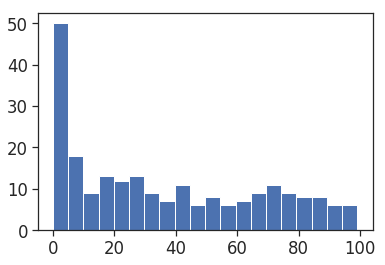

In [90]:
plt.hist(score_df[score_df['model']==model_spec_name_list[-1]]['precent_sensitive'], bins=20)

##### Scatter plot

In [91]:
# sns.regplot(data=score_df[score_df['model']=='cadrres-wo-sample-bias-weight'], x='precent_sensitive', y='precision_sensitive')

In [92]:
# sns.regplot(data=score_df[score_df['model']=='cadrres'], x='precent_sensitive', y='precision_sensitive')

In [93]:
label_dict = {}
label_dict['accuracy'] = 'Accuracy'
label_dict['MAE_sensitive'] = 'MAE (sensitive)'

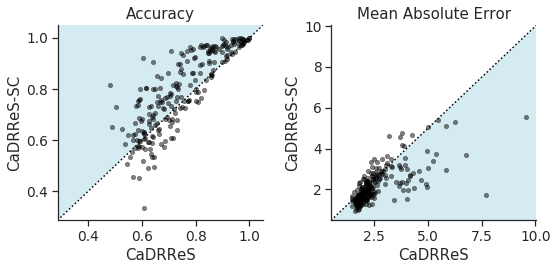

In [94]:
x_model = 'cadrres'
y_model = 'cadrres-wo-sample-bias-weight_HNSC'
# y_model = 'cadrres-wo-sample-bias'

sns.set(font_scale=1.25, style='ticks')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

for ax, s_name in zip(axes.flatten(), ['accuracy', 'MAE_sensitive']):
    x = score_df[score_df['model'] == x_model][s_name].values
    y = score_df[score_df['model'] == y_model][s_name].values
    
    sel = [~np.isnan(x) & ~np.isnan(y)]
    x = x[sel]
    y = y[sel]
    
    min_val = np.nanmin([np.nanmin(x), np.nanmin(y)])
    max_val = np.nanmax([np.nanmax(x), np.nanmax(y)])
    margin = 0.05 * max_val
    min_val = min_val-margin
    max_val = max_val+margin

    ax.scatter(x, y, s=20, color='black', linewidth=0.5, alpha=0.5)
    ax.plot((min_val, max_val), (min_val, max_val), color='black', linestyle=':')
    ax.set_xlim((min_val, max_val))
    ax.set_ylim((min_val, max_val))
    
    if s_name in ['MAE_sensitive']:
        polygon = patches.Polygon(np.array([(min_val, min_val), (max_val, min_val), (max_val, max_val)]),linewidth=0,edgecolor='green',facecolor='lightblue',alpha=0.5, zorder=0)
    else:
        polygon = patches.Polygon(np.array([(min_val, min_val), (min_val, max_val), (max_val, max_val)]),linewidth=0,edgecolor='green',facecolor='lightblue',alpha=0.5, zorder=0)
    ax.add_patch(polygon)
    
    ax.set_xlabel('CaDRReS')
    ax.set_ylabel('CaDRReS-SC')
    
    
axes.flatten()[0].set_title('Accuracy')
axes.flatten()[1].set_title('Mean Absolute Error')
    
sns.despine()
plt.tight_layout()
# plt.savefig('../figure/Figure3_cadrres_vs_cadrres-sc.svg')

In [95]:
# https://stackoverflow.com/questions/36874697/how-to-edit-properties-of-whiskers-fliers-caps-etc-in-seaborn-boxplot

def change_boxplot_edge_color(ax, col):
    for i, artist in enumerate(ax.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        artist.set_edgecolor(col)
        # artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)

accuracy RanksumsResult(statistic=-3.611996473421903, pvalue=0.00030384869935654236)
accuracy Ttest_relResult(statistic=-8.349338599928274, pvalue=7.011487666632825e-15)
MAE_sensitive RanksumsResult(statistic=4.180568144395204, pvalue=2.9078165155403485e-05)
MAE_sensitive Ttest_relResult(statistic=nan, pvalue=nan)


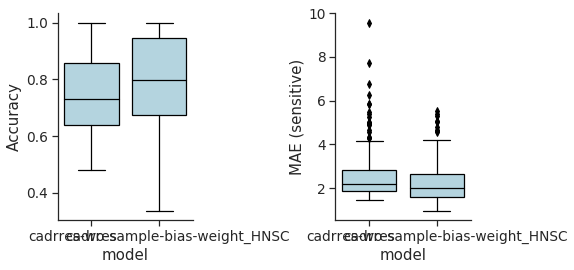

In [96]:
sns.set(font_scale=1.25, style='ticks')
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

for ax, s_name in zip(axes.flatten(), ['accuracy', 'MAE_sensitive']):
    
    temp_df = score_df[score_df['model'].isin([x_model, y_model])]
    sns.boxplot(data=temp_df, x='model', y=s_name, orient='v', fliersize=5, ax=ax, color='lightblue', linewidth=1.25)
    print (s_name, stats.ranksums(temp_df[temp_df['model']==x_model][s_name], temp_df[temp_df['model']==y_model][s_name]))
    print (s_name, stats.ttest_rel(temp_df[temp_df['model']==x_model][s_name], temp_df[temp_df['model']==y_model][s_name]))
#     sns.swarmplot(data=temp_df, x='model', y=s_name, orient='v', s=3, linewidth=0, alpha=0.7, ax=ax, color='black')
#     sns.violinplot(data=temp_df, y='model', x=s_name, orient='h', ax=ax, color='grey', inner='stick')
    
    ax.set_ylabel(label_dict[s_name])
    change_boxplot_edge_color(ax, 'black')
    
sns.despine()
plt.tight_layout()
# plt.savefig('../figure/Figure3_cadrres_vs_cadrres-sc_boxplot.svg')
plt.savefig('../figure/supplementary_cadrres_vs_cadrres-wo-sample-bias_boxplot.svg')

In [97]:
m1 = x_model
m2 = y_model

for s_name in ['accuracy', 'MAE_sensitive']:
    s_df = score_df[['drug_id', 'model', s_name]].pivot(index='drug_id', columns='model', values=s_name)
    print (s_name)
    
    print (np.sum(s_df[m1] <= s_df[m2]) / s_df[m1].shape[0], np.sum(s_df[m1] > s_df[m2]) / s_df[m1].shape[0])
    print (np.mean((s_df[m2] - s_df[m1]) / s_df[m1]))

accuracy
0.7300884955752213 0.26991150442477874
0.0648460445436997
MAE_sensitive
0.2610619469026549 0.7300884955752213
-0.11755733250085663


In [98]:
np.sum(s_df[m2].isnull())

2

##### Calculate improvement

In [99]:
accuracy_df = score_df.pivot(index='drug_id', columns='model', values='accuracy')
accuracy_df.loc[:, 'increase'] = accuracy_df['cadrres-wo-sample-bias-weight_HNSC'] - accuracy_df['cadrres']
accuracy_df = accuracy_df.sort_values('increase', ascending=False)
accuracy_df.loc[:, 'acc_increase_rank'] = [i+1 for i in range(accuracy_df.shape[0])]
accuracy_df.head()

model,cadrres,cadrres-wo-sample-bias,cadrres-wo-sample-bias-weight_HNSC,increase,acc_increase_rank
drug_id,,,,,
110,0.48,0.69,0.81,0.34,1
17,0.60,0.86,0.92,0.32,2
59,0.64,0.87,0.91,0.27,3
94,0.71,0.89,0.95,0.24,4
111,0.51,0.60,0.73,0.22,5


In [100]:
mae_df = score_df.pivot(index='drug_id', columns='model', values='MAE_sensitive')
mae_df.loc[:, 'increase'] = mae_df['cadrres'] - mae_df['cadrres-wo-sample-bias-weight_HNSC']
mae_df = mae_df.sort_values('increase', ascending=False)
mae_df.loc[:, 'mae_increase_rank'] = [i+1 for i in range(mae_df.shape[0])]
mae_df.head()

model,cadrres,cadrres-wo-sample-bias,cadrres-wo-sample-bias-weight_HNSC,increase,mae_increase_rank
drug_id,,,,,
1018,7.72,5.99,1.71,6.01,1
197,9.57,10.85,5.54,4.02,2
1072,6.75,7.37,3.71,3.05,3
1029,5.86,7.03,2.97,2.89,4
166,4.96,6.15,2.12,2.84,5


In [101]:
improve_rank_df = pd.merge(accuracy_df[['acc_increase_rank']], mae_df[['mae_increase_rank']], left_index=True, right_index=True)

improve_rank_df.mean(axis=1).sort_values()

drug_id
1        27.0
255      27.0
1129     27.0
279      33.0
171      37.5
        ...  
41      211.0
87      214.5
60      216.5
11      216.5
9       219.5
Length: 226, dtype: float64

### Figure 2C (v2 HNSC)

In [102]:
# # model_spec_name_list = ['cadrres', 'cadrres-wo-sample-bias', 'cadrres-wo-sample-bias-weight']
# model_spec_name_list = ['cadrres', 'cadrres-wo-sample-bias-weight_HNSC']

# score_df = pd.read_excel('../result/cv_pred/cv_score_summary_HNSC.xlsx')
# score_df = score_df[score_df['precent_sensitive'] >= 50]
# score_df = score_df[score_df['model'].isin(model_spec_name_list)]

# len(set(score_df['drug_id']))

In [103]:
# plt.hist(score_df[score_df['model']=='cadrres']['precent_sensitive'], bins=20)

##### Scatter plot

In [104]:
# x_model = 'cadrres'
# y_model = 'cadrres-wo-sample-bias-weight_HNSC'
# # y_model = 'cadrres-wo-sample-bias'

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# for ax, s_name in zip(axes.flatten(), ['accurary', 'MAE']):
#     x = score_df[score_df['model'] == x_model][s_name].values
#     y = score_df[score_df['model'] == y_model][s_name].values
    
#     sel = [~np.isnan(x) & ~np.isnan(y)]
#     x = x[sel]
#     y = y[sel]
    
#     min_val = np.nanmin([np.nanmin(x), np.nanmin(y)])
#     max_val = np.nanmax([np.nanmax(x), np.nanmax(y)])
#     margin = 0.05 * max_val
#     min_val = min_val-margin
#     max_val = max_val+margin

#     ax.scatter(x, y, s=20, color='black', linewidth=0.5, alpha=0.5)
#     ax.plot((min_val, max_val), (min_val, max_val), color='black', linestyle=':')
#     ax.set_xlim((min_val, max_val))
#     ax.set_ylim((min_val, max_val))
    
#     if s_name in ['MAE']:
#         polygon = patches.Polygon(np.array([(min_val, min_val), (max_val, min_val), (max_val, max_val)]),linewidth=0,edgecolor='green',facecolor='lightblue',alpha=0.2)
#     else:
#         polygon = patches.Polygon(np.array([(min_val, min_val), (min_val, max_val), (max_val, max_val)]),linewidth=0,edgecolor='green',facecolor='lightblue',alpha=0.2)
#     ax.add_patch(polygon)
    
#     ax.set_xlabel('CaDRReS')
#     ax.set_ylabel('CaDRReS-SC')

# axes.flatten()[0].set_title('Accurary')
# axes.flatten()[1].set_title('Mean Absolute Error')
    
# plt.tight_layout()
# plt.savefig('../figure/Figure2C_scatter_HNSC.svg')

##### Boxplot

In [105]:
# stacked_score_df = score_df.set_index(['drug_id', 'model']).stack().reset_index()
# stacked_score_df.columns = ['drug_id', 'model', 'score_name', 'score']

In [106]:
# sns.set(font_scale=1.25, style='ticks')

# fig, ax = plt.subplots(figsize=(3.5, 5))

# s_name = 'MAE' # accurary, spearman | MAE | f1 | f1_sensitive | precision_sensitive

# df = stacked_score_df[stacked_score_df['score_name']==s_name]

# pivot_df = df.pivot(index='drug_id', columns='model', values='score')
# x = pivot_df[pivot_df.columns[0]].values
# y = pivot_df[pivot_df.columns[1]].values
# print (stats.ttest_rel(x, y))

# # sns.violinplot(data=df, x='model', y='score', color='lightgrey', inner='box', ax=ax)
# sns.swarmplot(data=df, x='model', y='score', color='black', s=3, alpha=.75, ax=ax)
# sns.boxplot(data=df, x='model', y='score', color='white', fliersize=0, ax=ax)
# ax.set_xticklabels(['CaDRReS', 'CaDRReS-SC'], rotation=45, ha='right') # 'CaDRReS\nno-bias', 

# ax.set_ylabel(s_name[0].upper() + s_name[1:])
# ax.set_xlabel('')

# # ax.set_ylim((0.5, 4.5))
# # ax.set_ylim((0, 0.6))
# # ax.set_ylim((0.4, 1.09))
    
# plt.tight_layout()
# plt.savefig('../figure/Figure2C_{}_HNSC.svg'.format(s_name))

### Supplementary

In [107]:
import matplotlib.patches as patches

In [108]:
def logistic(x_vals, x0, k):
    return 100 / (1 + np.e**(-k * (x_vals - x0)))

[-2.5, -0.5, 3.5, 5.0]
99.33071490757152
62.245933120185455
0.09110511944006457
0.004539786870243442


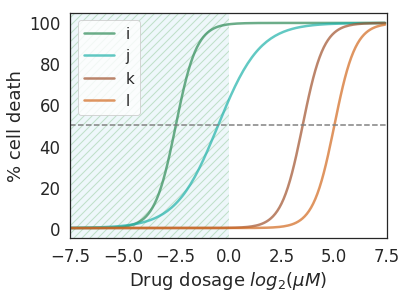

In [109]:
size = 7.5

dosages = np.arange(-size, size, 0.1)

response_dict = {}
response_dict['i'] = logistic(dosages, 5-size, 2)
response_dict['j'] = logistic(dosages, 7-size, 1)
response_dict['k'] = logistic(dosages, 11-size, 2)
response_dict['l'] = logistic(dosages, 12.5-size, 2)

print ([5-size, 7-size, 11-size, 12.5-size])
print (logistic(0, 5-size, 2))
print (logistic(0, 7-size, 1))
print (logistic(0, 11-size, 2))
print (logistic(0, 12.5-size, 2))

color_dict = {}
color_dict['i'] = 'seagreen'
color_dict['j'] = 'lightseagreen'
color_dict['k'] = 'sienna'
color_dict['l'] = 'chocolate'

sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(6, 4.5))

for d, resp in response_dict.items():
    ax.plot(dosages, resp, label=d, linewidth=2.5, alpha=0.7, color=color_dict[d])
    
ax.axhline(y=50, linestyle='--', color='grey')
    
rect = patches.Rectangle((-size,-5),size,110,linewidth=0,edgecolor='green',facecolor='lightblue', hatch='///', alpha=0.2)
ax.add_patch(rect)
    
ax.set_xlim((-size, size))
ax.set_ylim((-5, 105))
ax.set_xlabel('Drug dosage ' + r'$log_2(\mu M)$')
ax.set_ylabel('% cell death')
plt.legend(fontsize=15)

plt.tight_layout()

plt.savefig('../figure/supplementary_dose_response_curve.svg')

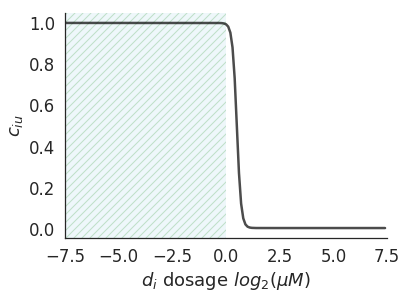

In [110]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(6, 4.5))

y = 1 - (logistic(dosages, 0.5, 10) / 100)
ax.plot(dosages, y, linewidth=2.5, alpha=0.7, color='black')
    
# ax.axhline(y=50, linestyle='--', color='grey')
    
rect = patches.Rectangle((-size,-5),size,110,linewidth=0,edgecolor='green',facecolor='lightblue', hatch='///', alpha=0.2)
ax.add_patch(rect)
    
ax.set_xlim((-size, size))
ax.set_ylim((-0.05, 1.05))
ax.set_xlabel(r'$d_i$' + ' dosage ' + r'$log_2(\mu M)$')
ax.set_ylabel(r'$c_{iu}$')
# plt.legend(fontsize=15)

sns.despine()

plt.tight_layout()

### Figure 2D

- CaDRReS_package/notebook/cadrres_train_models_sample_weight.ipynb
- CaDRReS_package/notebook/todo_cadrres_predict_with_gdsc_model.ipynb

In [438]:
# cadrres_model_dict = pickle.load(open('../../CaDRReS_package/output_weighted/hn_84_drug_cw_dw10_100000_param_dict.pickle', 'rb'))
# cadrres_output_dict = pickle.load(open('../../CaDRReS_package/output_weighted/hn_84_drug_cw_dw10_100000_output_dict.pickle', 'rb'))

cadrres_model_dict = pickle.load(open('../result/HN_model/hn_drug_cw_dw10_100000_param_dict.pickle', 'rb'))
cadrres_output_dict = pickle.load(open('../result/HN_model/hn_drug_cw_dw10_100000_output_dict.pickle', 'rb'))

# cadrres_model_dict = pickle.load(open('../result/HN_model/hn_drug_cw_dw1_100000_param_dict.pickle', 'rb'))
# cadrres_output_dict = pickle.load(open('../result/HN_model/hn_drug_cw_dw1_100000_output_dict.pickle', 'rb'))

# cadrres_model_dict = pickle.load(open('../result/HN_model/hn_drug_cw_dwsim10_100000_param_dict.pickle', 'rb'))
# cadrres_output_dict = pickle.load(open('../result/HN_model/hn_drug_cw_dwsim10_100000_output_dict.pickle', 'rb'))

In [439]:
gdsc_sample_df = pd.read_csv('../data/GDSC/GDSC_tissue_info.csv', index_col=0)
gdsc_sample_df.index = gdsc_sample_df.index.astype(str)

gdsc_sample_list = pd.read_csv('../data/GDSC/gdsc_all_abs_ic50_bayesian_sigmoid_only9dosages.csv', index_col=0).index.astype(str)

gdsc_hn_sample_list = gdsc_sample_df[gdsc_sample_df['TCGA_CLASS']=='HNSC'].index

gdsc_drug_df = pd.read_csv('../preprocessed_data/GDSC/drug_stat.csv', index_col=0)
gdsc_drug_df.index = gdsc_drug_df.index.astype(str)

##### Plot

In [440]:
improve_rank_df.loc[cadrres_output_dict['obs_train_df'].columns.astype(int)].sort_values('mae_increase_rank')

model,acc_increase_rank,mae_increase_rank
Drug ID,,
1010,138,21
1032,118,27
1012,140,33
157,141,39
1149,158,46
...,...,...
1060,119,202
177,56,203
1031,199,204


In [441]:
drug_id = '201'

In [442]:
gdsc_drug_df.loc[drug_id]

Drug Name                                         Epothilone B
Synonyms                  Patupilone, EpoB, EPO906, GNF-PF-193
Target                                  Microtubule stabiliser
Target Pathway                                         Mitosis
Selleckchem Cat#                                         S1364
CAS number                                         152044-54-7
PubCHEM                                                 448013
Others                                                     NaN
entropy                                                    4.1
max_conc                                                 0.032
log2_max_conc                                               -5
num_cl                                                     931
num_cl_hn                                                   42
log2_median_ic50                                          -7.3
median_ic50                                             0.0065
median_ic50_3f                                         

In [443]:
x_all = np.array(cadrres_output_dict['obs_train_df'][[drug_id]]).flatten()
y_all = np.array(cadrres_output_dict['pred_train_df'][[drug_id]]).flatten()
scor_all, pval_all = stats.spearmanr(x_all[~np.isnan(x_all)], y_all[~np.isnan(x_all)])
print (scor_all, pval_all)

0.640559199361471 6.985058847117078e-102


In [444]:
x = np.array(cadrres_output_dict['obs_train_df'].loc[gdsc_hn_sample_list, drug_id]).flatten()
y = np.array(cadrres_output_dict['pred_train_df'].loc[gdsc_hn_sample_list, drug_id]).flatten()

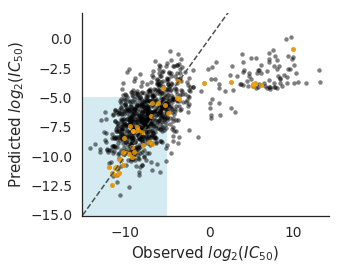

In [448]:
sns.set(font_scale=1.25, style='white')
fig, ax = plt.subplots(figsize=(5, 4))


ax.scatter(x_all[~np.isnan(x_all)], y_all[~np.isnan(x_all)], s=20, color='black', linewidth=0, alpha=0.5, label='All')
# ax.scatter(x[~np.isnan(x)], y[~np.isnan(x)], color='orange', linewidth=0, s=25, alpha=0.8, label='Head and neck')
# ax.axvline(x=gdsc_drug_df.loc[drug_id, 'log2_max_conc'])

ax.set_xlabel(r'Observed $log_2(IC_{50})$')
ax.set_ylabel(r'Predicted $log_2(IC_{50})$')

margin = 1
min_val = np.nanmin(np.concatenate([x_all, y_all]))-margin
max_val = np.nanmax(np.concatenate([x_all, y_all]))+margin

ax.plot([min_val-margin, max_val+margin], [min_val-margin, max_val+margin], ls="--", c=".3")

max_conc = gdsc_drug_df.loc[drug_id, 'log2_max_conc']
# rect = patches.Rectangle((min_val, min_val), np.abs(min_val-max_conc) ,np.abs(min_val-max_conc),linewidth=0,edgecolor='green',facecolor='lightblue', hatch='///', alpha=0.2)
rect = patches.Rectangle((min_val, min_val), np.abs(min_val-max_conc) ,np.abs(min_val-max_conc),linewidth=0,edgecolor='lightblue',facecolor='lightblue', alpha=0.5, zorder=0)
ax.add_patch(rect)

plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val-12))
# plt.ylim((-y_size, y_size))

plt.tight_layout()

plt.rcParams['legend.title_fontsize'] = 14
# plt.legend(fontsize=14, handletextpad=0.03, title="Afatinib (ERBB2)")

sns.despine()
plt.savefig('../figure/Figure3C.svg')